# Reference
[uproot documentation](https://uproot.readthedocs.io/en/latest/)

# File management and helper classes

In [1]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np

  Using cached uproot-5.4.1-py3-none-any.whl.metadata (32 kB)
  Using cached awkward-2.6.9-py3-none-any.whl.metadata (7.0 kB)
  Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached awkward_cpp-39-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached uproot-5.4.1-py3-none-any.whl (357 kB)
Using cached awkward-2.6.9-py3-none-any.whl (835 kB)
Using cached awkward_cpp-39-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (637 kB)
Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


# Get data from tree

In [2]:
events = Events("CheatedRecoFile_10.root")

In [3]:
idx = np.where(events.event_number == 2)

In [4]:
idx

(array([ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175]),)

In [5]:
this_idx = 157
print(events.is_cc[this_idx])
print(events.is_nue[this_idx])
print(events.is_numu[this_idx])
print(events.mc_pdg[this_idx])

1
0
1
22


# Extract hits in each view

# Extract hits in each view

Getting the hits from each view is quite simple, you need only pass in an Event object and specify the view you want. Now however, if you access a variable in the view and specify a specific event, e.g.

`view_w.z[1]`

you'll get back one array with all of the information for that event in the view of interest. All of the PFO details are lost, but this approach is very convenient for event displays (see below).

In [6]:
view_u = View(events, "u")
view_v = View(events, "v")
view_w = View(events, "w")

In [7]:
view_w.z[1]

array([1273.6763, 1274.1553, 1274.6343, 1275.1133, 1275.5923, 1276.0713,
       1276.5503, 1277.0293, 1277.5083, 1277.9873, 1278.4663, 1278.9452,
       1279.4242, 1279.9032, 1280.3822, 1280.8612, 1281.3402, 1281.8192,
       1282.2982, 1282.7772, 1283.2562, 1283.7352, 1284.2142, 1284.6932,
       1285.1722, 1285.6512, 1286.1302, 1286.6093, 1287.0883, 1287.5673,
       1288.0463, 1288.5253, 1289.0043, 1289.4833, 1289.9623, 1290.4413,
       1290.9203, 1291.3993, 1291.8783, 1292.3573, 1292.8363, 1293.3153,
       1293.7942, 1294.2732, 1294.7522, 1295.2312, 1295.7102, 1296.1892,
       1296.6682, 1297.1472, 1297.6262, 1298.1052, 1298.5842, 1299.0632,
       1299.5422, 1300.0212, 1300.5002, 1300.9792, 1301.4583, 1301.9373,
       1302.4163, 1302.8953, 1303.3743, 1303.8533, 1304.3323, 1304.8113,
       1305.2903, 1305.7693, 1306.2483, 1306.7273, 1307.2063, 1307.6853,
       1308.1643, 1308.6433, 1309.1222, 1309.6012, 1310.0802, 1310.5592,
       1311.0382, 1311.5172, 1311.9962, 1312.4752, 

# Display an event

In [8]:
import matplotlib
import matplotlib.pyplot as plt
titlesize = 20
labelsize = 14

Event displays are useful. We encourage you to make extensive use of them in helping you to understand what you're algorithms are doing, both from the perspective of thinking through what you think your algorithm should do, where it might encounter problems, and also as a debugging tool - if you're trying to reconstruct a vertex location, plot it on the relevant event display, as this will be much easier to interpret than the raw numbers. It's best to start with a 2D event display (e.g. for W view), then you can compare the same event, as seen in e.g. U and V views too.

You might want to indicate the energy associated with each hit object in your display. This can be achieved using the view.adc variable to weight the hits at the corresponding coordinate (view.x and view.z). ADC is an indication (an input to a more formal calibration scheme, if you like) of the energy associated with a given hit, in units of analogue-to-digital counts. x is the LArTPC coordinate associated with the drift time (multiplied by the constant drfit velocity). z is the LArTPC coordinate associated with the position of the wire where the hit was identified.

The true/generated position of the neutrino interaction vertex can also be extracted, and a marker added.

# Saving plots and numpy arrays

Below is a simple utility function you can call whenever you want to save a plot, creating directories as needed and producing output both in png, jpg and in vector graphics format

In [9]:
import os

def save_plot(fig, directory, filename):
    if not os.path.exists(directory):
        os.mkdir(directory)
    fig.savefig(f'{directory}/{filename}.png', bbox_inches='tight', dpi=200, facecolor='w')
    fig.savefig(f'{directory}/{filename}.jpg', bbox_inches='tight', dpi=200)
    fig.savefig(f'{directory}/{filename}.svg', bbox_inches='tight', dpi=200)

You'll likely produce numpy arrays as either final results or intermediate steps, so it's worth getting into the habit of saving at least some of these arrays. While you will often work with small subsets of the data when testing out new functions, there will be times when you will need the larger datasets, and depending on the computational efficiency of your code, some of these steps may take quite a long time.

For this, numpy.save("your_filename", your_array) and the corresponding your_array = numpy.load("your_filename") will be helpful. Test that these are working on small arrays early and then be sure to save large arrays as necessary, being careful to ensure you don't overwrite things you meant to keep.

In [10]:

import matplotlib.pyplot as plt


def plot_event_hits_energy(view, event_index):
    
    # Extract data for the specified event
    x_hits = view.x[event_index]  # Drift position (X) - getting our coordinates
    w_hits = view.z[event_index]  # Wire position (W)
    adc_values = view.adc[event_index] # Pulling energy values
    true_vertex_x = view.true_vtx_x[event_index] # Plotting where interaction happened
    true_vertex_w = view.true_vtx_z[event_index]
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))  # Figure size
    scatter = plt.scatter(w_hits, x_hits, c=adc_values, cmap='viridis', s=5, alpha=0.7) # scatter plot
    plt.colorbar(scatter, label='ADC (Energy Deposit)') # Generating Colour Bar
    
    # Plot the true neutrino interaction vertex
    plt.scatter(true_vertex_w, true_vertex_x, c='red', marker='x', label="True Interaction Vertex")
    
    # Labeling and plot settings
    plt.title(f"Event Display (W View) - Event {event_index}")
    plt.xlabel("W (Wire Position)")
    plt.ylabel("X (Drift Position)")
    plt.legend()
    plt.grid(True)
    plt.show()

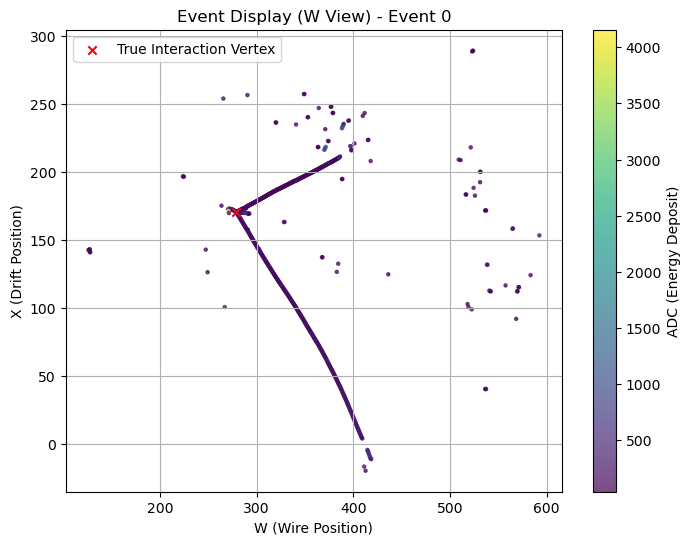

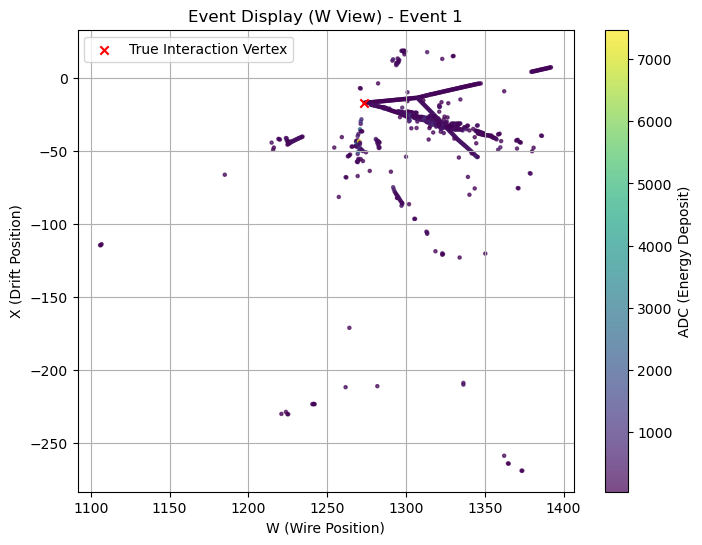

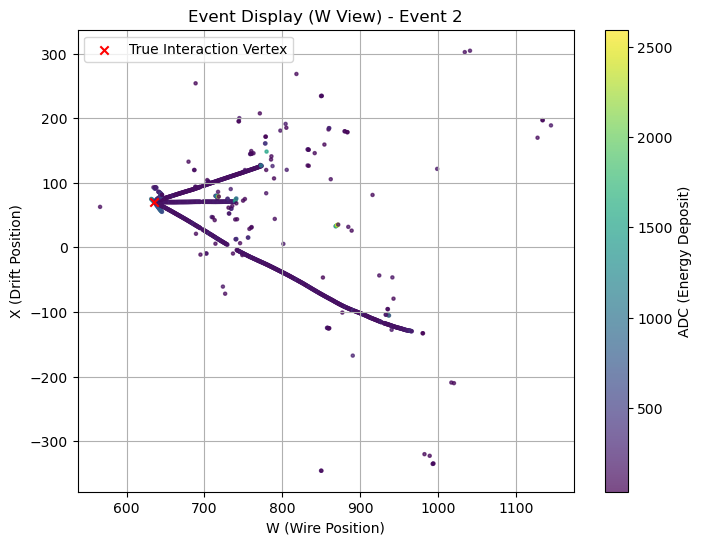

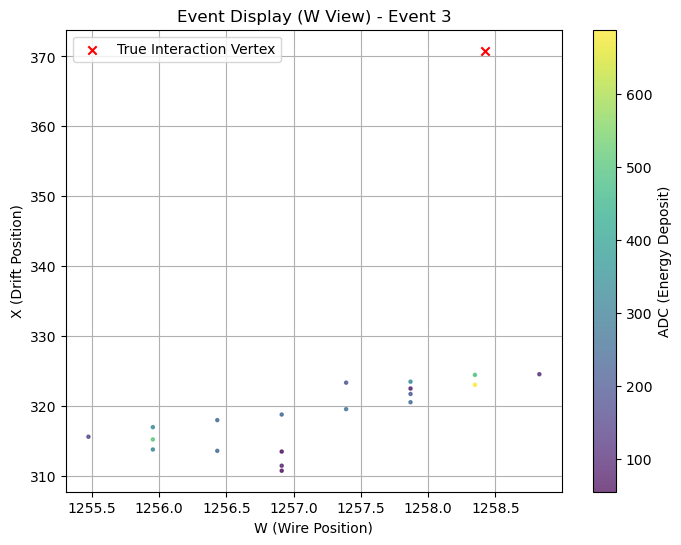

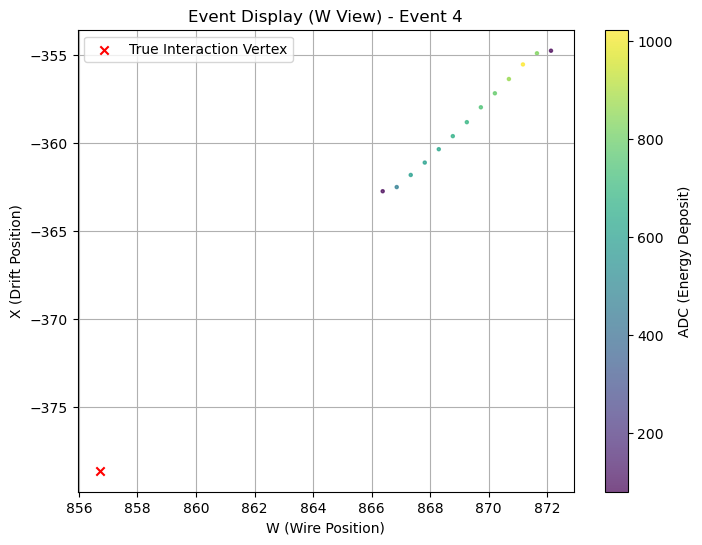

In [11]:
# Plot the first 5 events
for i in range(5):
    plot_event_hits_energy(view_w, event_index=i)

In [12]:

class View2:
    def __init__(self, events, view):
        if type(events) != Events:
            raise Exception("Parameter 'events' not of type Events")
        if view.lower() not in ["u", "v", "w"]:
            raise Exception("Parameter 'view' not one of u, v or w")
        all_events = np.unique(events.event_number)
        self.true_vtx_x = np.array([ events.true_neutrino_vtx_x[np.where(events.event_number == e)][0]
                                           for e in all_events ])
        if view.lower() == "u":
            self.x = [ np.concatenate(events.reco_hits_x_u[np.where(events.event_number == e)]) # concatneate adds arrays together so plot easy
                                           for e in all_events ] # self = setting a value for it self
            self.z = [ np.concatenate(events.reco_hits_u[np.where(events.event_number == e)])
                                           for e in all_events ]
            self.adc = [ np.concatenate(events.reco_adcs_u[np.where(events.event_number == e)])
                                             for e in all_events ] # here
            self.true_vtx_z = np.array([ events.neutrino_vtx_u[np.where(events.event_number == e)][0]
                                        for e in all_events ])
        elif view.lower() == "v":
            self.x = [ np.concatenate(events.reco_hits_x_v[np.where(events.event_number == e)])
                                           for e in all_events ]
            self.z = [ np.concatenate(events.reco_hits_v[np.where(events.event_number == e)])
                                           for e in all_events ]
            self.adc = [ np.concatenate(events.reco_adcs_v[np.where(events.event_number == e)])
                                             for e in all_events ]
            self.true_vtx_z = np.array([ events.neutrino_vtx_v[np.where(events.event_number == e)][0]
                                        for e in all_events ])
        else:
            self.x = [ np.concatenate(events.reco_hits_x_w[np.where(events.event_number == e)])
                                           for e in all_events ]
            self.z = [ np.concatenate(events.reco_hits_w[np.where(events.event_number == e)])
                                           for e in all_events ]
          
            self.true_vtx_z = np.array([ events.true_neutrino_vtx_w[np.where(events.event_number == e)][0]
                                        for e in all_events ])
            self.mc_pdg = []  
            for e in all_events: # whole list of events
                # For each sub-event, repeat its mc_pdg value for the corresponding hits
                sub_events = np.where(events.event_number == e)[0]  # in all those events there is an event number that matches
                event_mc_pdg = []  # Temporary list to hold mc_pdg for this event_number
                for sub_event in sub_events: # for every sub event in the sub events list (1 event idx)
                    mc_value = events.mc_pdg[sub_event]  # Get mc_pdg for this sub-event (there is only 1)
                    sub_hits = events.reco_hits_w[sub_event]  # Get hits for this sub-event (gets me length of array of that particular event idx)
                    event_mc_pdg.append(np.full(len(sub_hits), mc_value))  # Repeat mc_pdg for hits (gives every number in that array the mc value and appends (adds more array to it) it)

                # Append the mc_pdg sub-arrays for this event_number as a single concatenated array
                self.mc_pdg.append(np.concatenate(event_mc_pdg)) # appending a new array underneath it - for all the events we are looking at its concatinating the sub results and then adds it to the master array

all_events = np.unique(events.event_number)
print("Unique Events", len(all_events))
print("Event Outcomes", len(events.event_number))
#[ np.concatenate(events.reco_hits_w[np.where(events.event_number == this_idx)])
 #                                          for e in all_events ]
view_u = View(events, "u")
view_v = View(events, "v")
view_w = View(events, "w")
pdg = View2(events,"w")


Unique Events 842
Event Outcomes 43740


In [13]:
import matplotlib.pyplot as plt

# Define the color mapping for specific PDG codes and their corresponding particle names
pdg_colours = {
    11: ("orange", "Electron"),    # Electron
    -11: ("green", "Positron"),    # Positron
    13: ("black", "Muon"),         # Muon
    -13: ("blue", "Antimuon"),     # Antimuon
    22: ("red", "Photon"),         # Photon
    211: ("magenta", "Pion+"),     # Pion+
    -211: ("cyan", "Pion-"),       # Pion-
    2212: ("yellow", "Proton")     # Proton
}

def plot_event_hits_pdg2(view, event_index):
    # Extract data for the specified event
    x_hits = view.x[event_index]  # Drift position (X)
    w_hits = view.z[event_index]  # Wire position (W)
    mc_pdg = view.mc_pdg[event_index] # calls the pdg array

    true_vertex_x = view.true_vtx_x[event_index]  # True interaction vertex (X)
    true_vertex_w = view.true_vtx_z[event_index]  # True interaction vertex (W)

    # Create a colour array based on mc_pdg values
    colour_array = [pdg_colours.get(pdg, ('grey', 'Unknown'))[0] for pdg in mc_pdg]  # Default to 'grey' if not found

    # Create the scatter plot
    plt.figure(figsize=(8, 6))  # Figure size
    scatter = plt.scatter(w_hits, x_hits, c=colour_array, s=5, alpha=0.7)  # Scatter plot for hits
    
    # Plot the true neutrino interaction vertex
    plt.scatter(true_vertex_w, true_vertex_x, c='red', marker='x', label="True Interaction Vertex")

    # Manually create a legend using particle names
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=name)
               for color, name in pdg_colours.values()]
    plt.legend(handles=handles, title="Particle Types")

    # Labeling and plot settings
    plt.title(f"Event Display (W View) - Event {event_index}")
    plt.xlabel("W (Wire Position)")
    plt.ylabel("X (Drift Position)")
    plt.grid(True)
    plt.show()

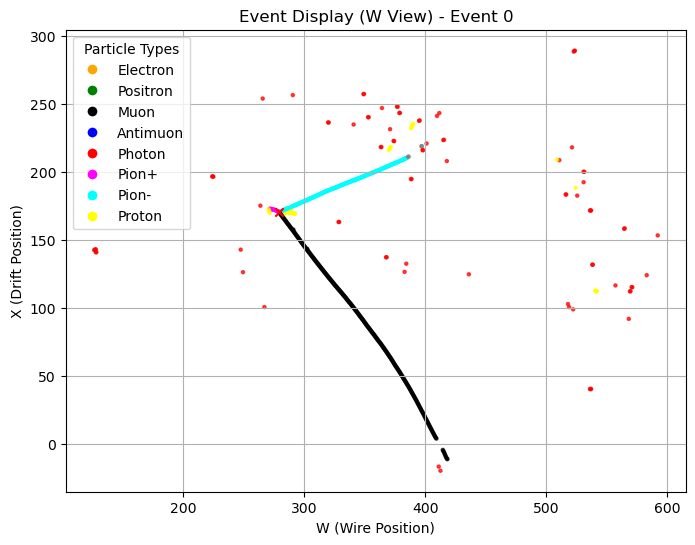

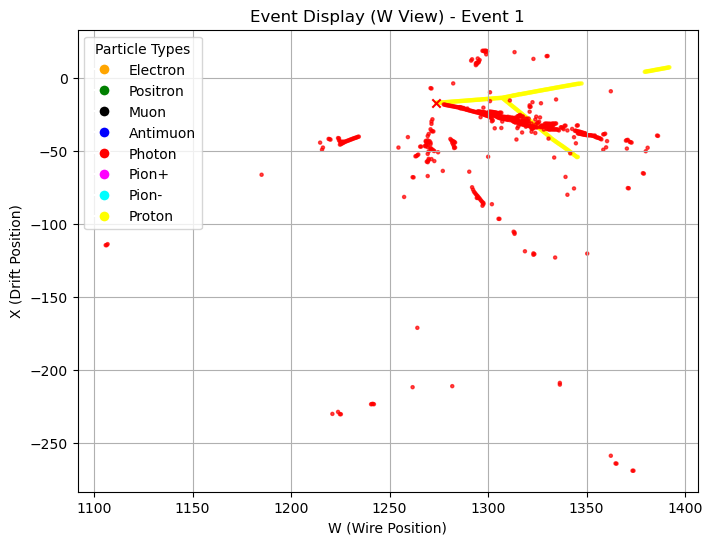

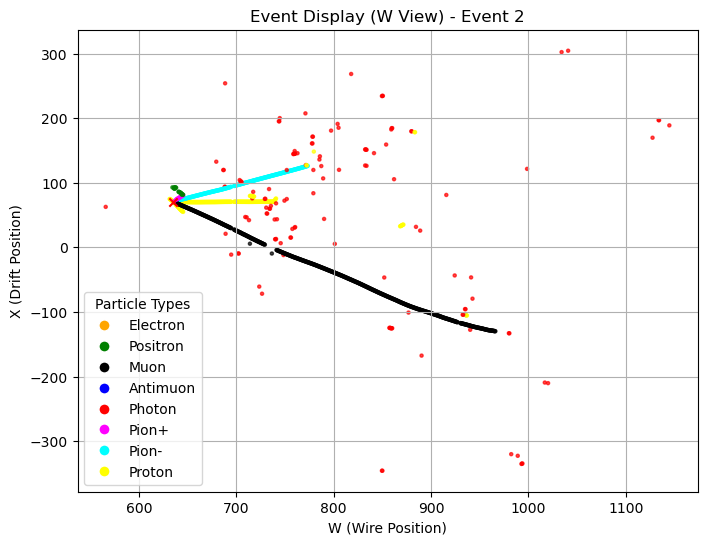

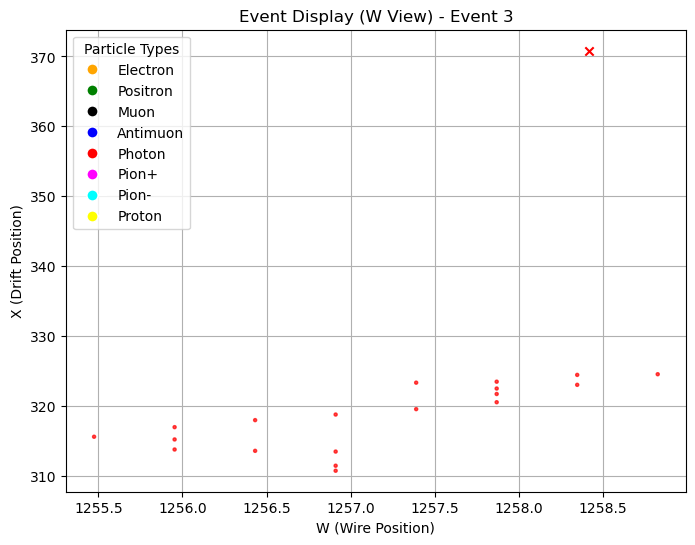

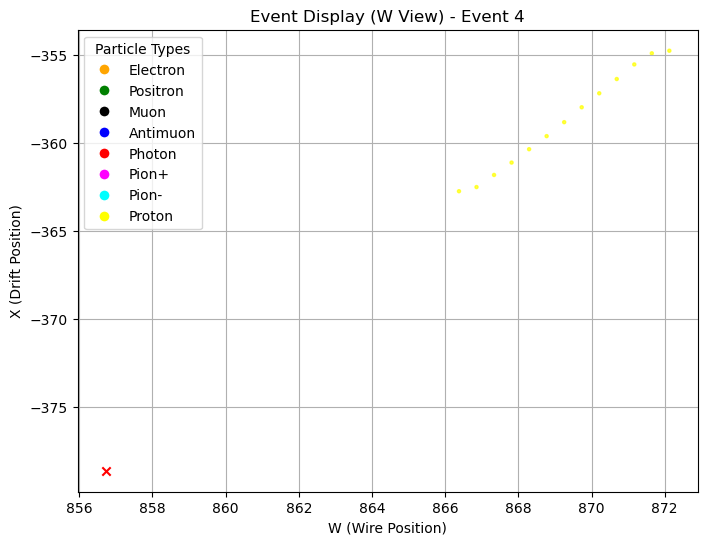

In [14]:
# Plot the first 5 events
for i in range(5):
    plot_event_hits_pdg2(pdg, event_index=i)